<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

----

This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [**here**](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

In [5]:
# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [9]:
pox.dtypes # the 'date' column is a string

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [7]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the Date column to a datetime type**

Use **pd.to_datetime** to convert the Date column to a datetime.

**WARNING**: The date column is formatted as day-month-year. Does **pd.to_datetime** work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check the [**documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for **pd.to_datetime**, and see if one of the settings fixes things.

In [ ]:
# dd/mm/yyyy to yyyy-mm-dd

In [13]:
pox['date'] = pd.to_datetime(pox['date'], dayfirst=True)
pox['date']

0     2005-01-03
1     2005-01-10
2     2005-01-17
3     2005-01-24
4     2005-01-31
         ...    
517   2014-12-01
518   2014-12-08
519   2014-12-15
520   2014-12-22
521   2014-12-29
Name: date, Length: 522, dtype: datetime64[ns]

**Set the **Date** column to be the index**

In [15]:
pox = pox.set_index('date').sort_index()
pox

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122
...,...
2014-12-01,95
2014-12-08,43
2014-12-15,35


In [17]:
pox.tail()

,budapest_cases
date,
2014-12-01,95
2014-12-08,43
2014-12-15,35
2014-12-22,30
2014-12-29,259


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [ ]:
# (yyyy-mm-dd)
# earliest date: 2005-01-03
# last date: 2014-12-29

**Plot a histogram of the Budapest cases column**

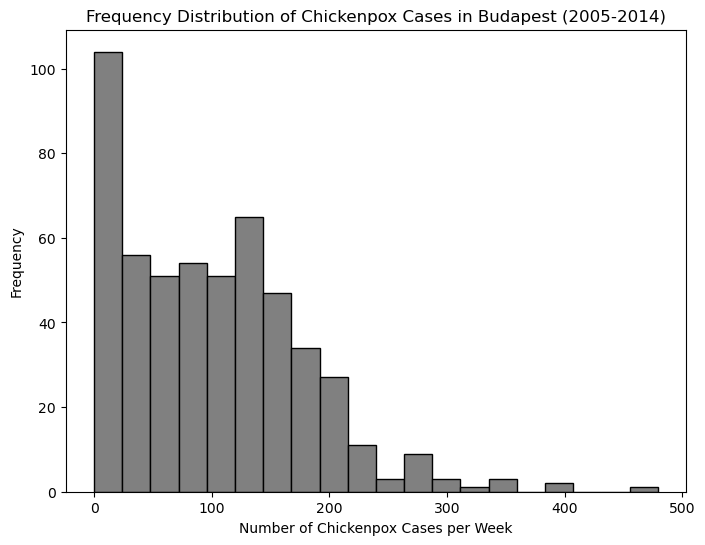

In [61]:
plt.figure(figsize=(8, 6))
plt.hist(pox['budapest_cases'], bins=20, color='gray', edgecolor='black')
plt.title('Frequency Distribution of Chickenpox Cases in Budapest (2005-2014)')
plt.xlabel('Number of Chickenpox Cases per Week')
plt.ylabel('Frequency')
plt.show(); #positive skew, data is mostly distributed to the left (approx. < 150 a week), the mode is below 25 cases/per week.

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method on the DataFrame to answer this question.

In [27]:
pox.resample('YE').sum() #'YE' is year-end 

# Year 2005 had 4562 cases

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


### Visualizations

**Make a line plot of chickenpox cases**

In [33]:
pox['budapest_cases'].rolling(3).mean().dropna() #dropping the 2 NaN values at the beginning, as there are not enough for 3 weeks prior to do rolling mean.  

date
2005-01-17    140.333333
2005-01-24    138.666667
2005-01-31    127.000000
2005-02-07    153.000000
2005-02-14    149.666667
                 ...    
2014-12-01     65.333333
2014-12-08     51.333333
2014-12-15     57.666667
2014-12-22     36.000000
2014-12-29    108.000000
Name: budapest_cases, Length: 520, dtype: float64

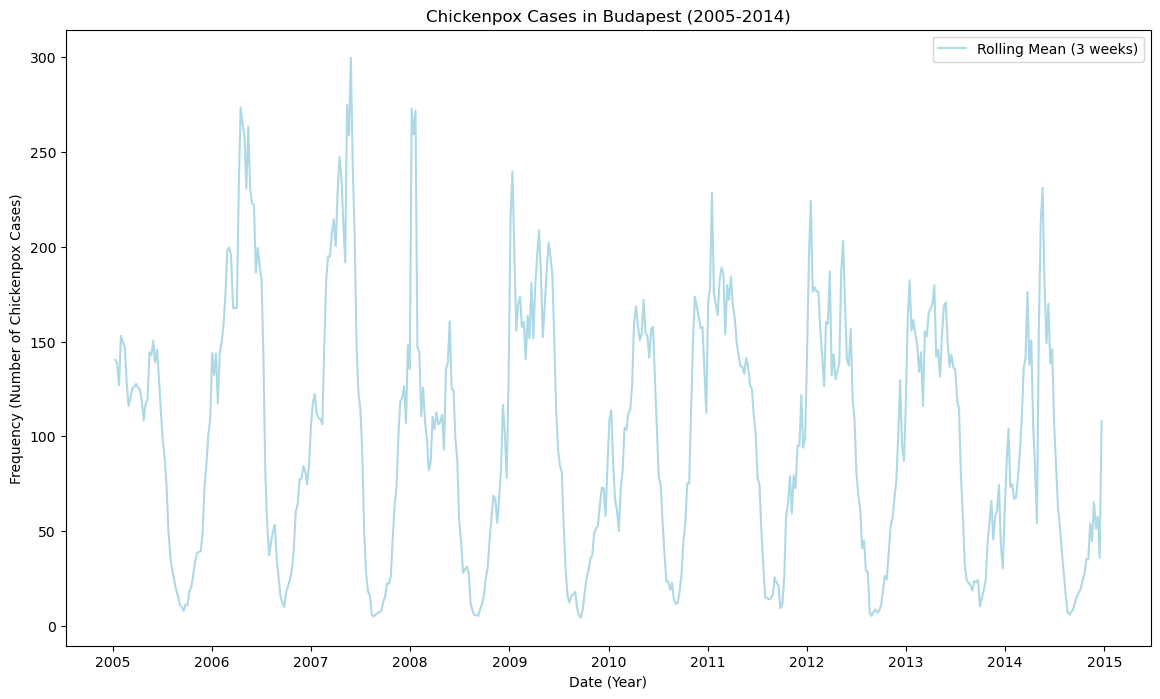

In [71]:
# plotting year trend rolling mean e.g. 3 weeks

plt.figure(figsize=(14,8))
plt.plot(pox['budapest_cases'].rolling(3, center=True).mean(), color='lightblue', label='Rolling Mean (3 weeks)') #center=True for timeframe to be centered
plt.title('Chickenpox Cases in Budapest (2005-2014)')
plt.xlabel('Date (Year)')
plt.ylabel('Frequency (Number of Chickenpox Cases)')
plt.legend()
plt.show() 

**In short answer format, describe any apparent trends**

In [ ]:
# Cyclical, seasonal trend with peaks and troughs. 
# The peaks occur approximately at the beginning of the year, with some exceptions e.g. 2006, 2007, 2014 peaks starting slightly later)
# Amplitudes slightly decreasing over time, small downward trend, lower/narrower range of cases of chickenpox as time goes by.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

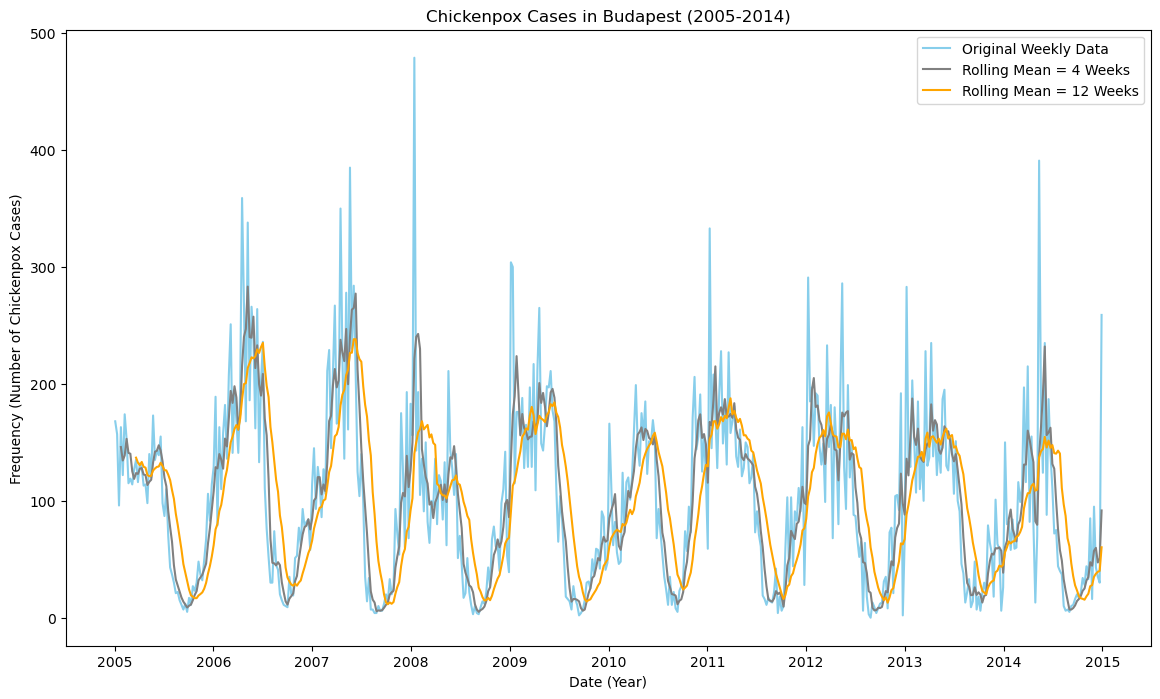

In [57]:
# same graph but with weekly data (original), MA=4, and MA=12 (MA=moving average/rolling mean)

plt.figure(figsize=(14,8))
plt.plot(pox['budapest_cases'], color='skyblue', label='Original Weekly Data')
plt.plot(pox['budapest_cases'].rolling(4).mean(), color='gray', label='Rolling Mean = 4 Weeks')
plt.plot(pox['budapest_cases'].rolling(12).mean(), color='orange', label='Rolling Mean = 12 Weeks')
plt.title('Chickenpox Cases in Budapest (2005-2014)')
plt.xlabel('Date (Year)')
plt.ylabel('Frequency (Number of Chickenpox Cases)')
plt.legend()
plt.show()

In [ ]:
# Implementing the rolling mean / moving average smoothes out the noise/fluctuations in the data which makes it easier to visualize.
# Increasing the rolling mean from 4 weeks (gray line) to 12 weeks (orange line), the latter has a smoother curve.

### Plot yearly chickenpox cases

You may need to use [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again for this.

In [55]:
pox.resample('YE').sum()

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


In [93]:
pox.resample('YE').sum().sort_values(by='budapest_cases', ascending=False) #2006, 2007, 2009 had the highest number of total cases, lowest=2014, 2008, 2005

,budapest_cases
date,
2006-12-31,6498
2007-12-31,6311
2009-12-31,5527
2011-12-31,5404
2012-12-31,5353
2010-12-31,5222
2013-12-31,5157
2005-12-31,4562
2008-12-31,4441


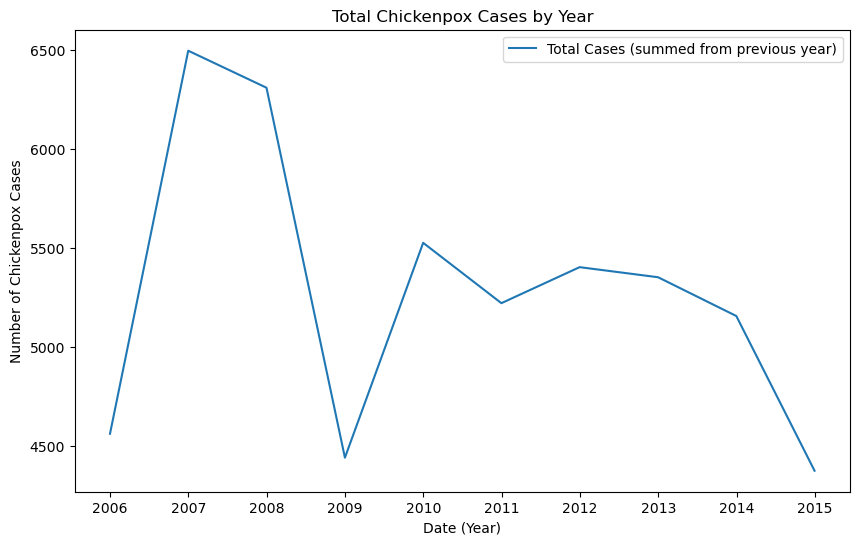

In [95]:
# plot yearly cases using resample('YE').sum() data showing yearly chickenpox cases?

plt.figure(figsize=(10, 6))
plt.plot(pox.resample('YE').sum(), label='Total Cases (summed from previous year)')
plt.xlabel('Date (Year)') 
plt.ylabel('Number of Chickenpox Cases') 
plt.title('Total Chickenpox Cases by Year') 
plt.legend() 
plt.show()

# There is a peak in the number of cases at the end of year 2006 (labeled 2007). 
# We see a dramatic dip in cases at the end of year 2008 (labeled 2009). This was not apparent in the previous visualizations above using the rolling mean.
# low number of chickenpox cases (<5000) : the first and last years (end of 2005, end of 2014) (labeled 2006 and 2015). 

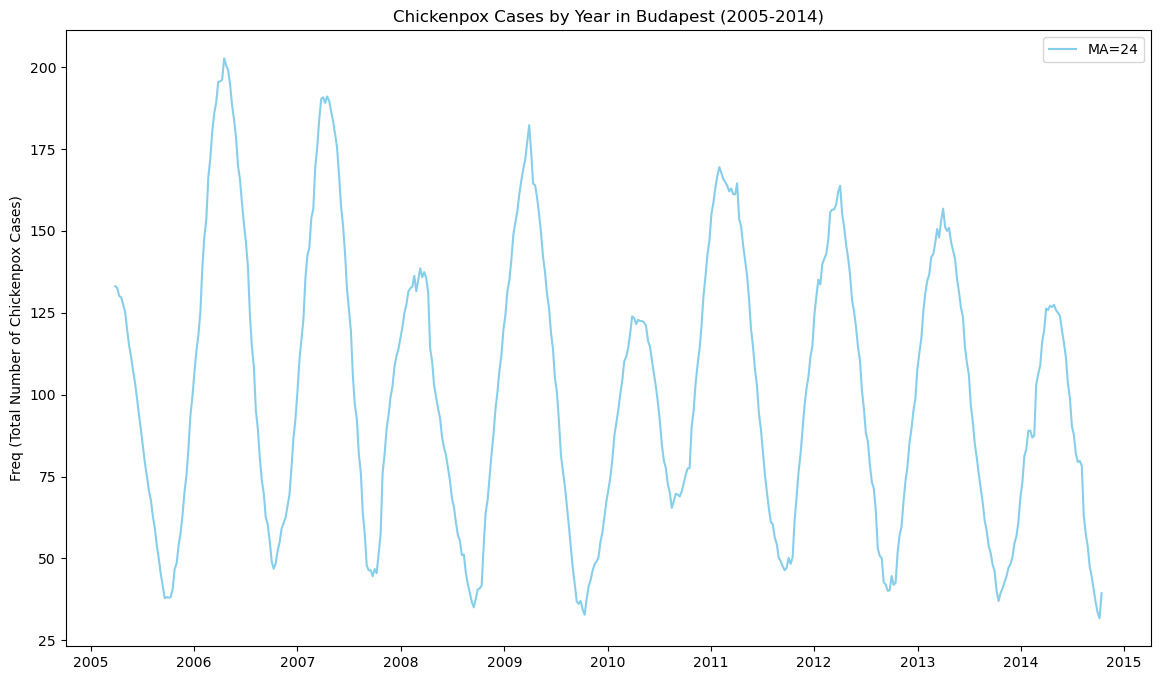

In [85]:
#Comparing with the rolling mean visualization: 

plt.figure(figsize=(14,8))
plt.plot(pox['budapest_cases'].rolling(24, center=True).mean(), color='skyblue', label='MA=24')
plt.title('Chickenpox Cases by Year in Budapest (2005-2014)')
plt.ylabel('Freq (Total Number of Chickenpox Cases)')
plt.legend()
plt.show()